# Dataset: Weekly Infectious Diseases Bulletin Cases

## Objective 1: General Information of the Dataset

In [3]:
import pandas as pd

df = pd.read_csv('ca02_data/weekly-infectious-disease-bulletin-cases.csv')

# Information of Original Dataset
print("===================== Information of Original Dataset ====================="); print()

print("This is the shape of the dataset")
print(df.shape);print()

print("This is the index of the dataset")
print(df.index);print()

print("These are the columns in the dataset")
print(df.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df.count());print()

print("A summary of this dataset is shown below:")
print(df.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df.describe()); print()

===================== Information of Original Dataset =====================

This is the shape of the dataset
(10100, 3)

This is the index of the dataset
RangeIndex(start=0, stop=10100, step=1)

These are the columns in the dataset
Index(['epi_week', 'disease', 'no._of_cases'], dtype='object')

The total number of non-NA values in this dataset is:
epi_week        10100
disease         10100
no._of_cases    10100
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 3 columns):
epi_week        10100 non-null object
disease         10100 non-null object
no._of_cases    10100 non-null int64
dtypes: int64(1), object(2)
memory usage: 236.8+ KB
None

A descriptive statistical summary of this dataset is shown below:
       no._of_cases
count  10100.000000
mean      28.855347
std      127.320575
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max     1682.000000



## Objective 2: Filter out disease = 'Dengue Fever'

In [4]:
import pandas as pd

df = pd.read_csv('ca02_data/weekly-infectious-disease-bulletin-cases.csv')

# Filter out disease "Dengue Fever"
df_dengue = df[df.disease == 'Dengue Fever']
df_dengue = df_dengue.reset_index()
df_dengue = df_dengue.drop(['index'], axis = 1)  # at this point disease has been filtered, thus redundant


# Information of new Dengue Fever Cases (by week) Dataset
print("===================== Information of new Dengue Fever Cases (by week) Dataset ====================="); print()

print("This is the shape of the dataset")
print(df_dengue.shape);print()

print("This is the index of the dataset")
print(df_dengue.index);print()

print("These are the columns in the dataset")
print(df_dengue.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df_dengue.count());print()

print("A summary of this dataset is shown below:")
print(df_dengue.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df_dengue.describe()); print()

===================== Information of new Dengue Fever Cases (by week) Dataset =====================

This is the shape of the dataset
(313, 3)

This is the index of the dataset
RangeIndex(start=0, stop=313, step=1)

These are the columns in the dataset
Index(['epi_week', 'disease', 'no._of_cases'], dtype='object')

The total number of non-NA values in this dataset is:
epi_week        313
disease         313
no._of_cases    313
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 3 columns):
epi_week        313 non-null object
disease         313 non-null object
no._of_cases    313 non-null int64
dtypes: int64(1), object(2)
memory usage: 7.4+ KB
None

A descriptive statistical summary of this dataset is shown below:
       no._of_cases
count    313.000000
mean     230.709265
std      179.296011
min       24.000000
25%       81.000000
50%      204.000000
75%      314.000000
max      888.000000


## Objective 3:  Sort out its weeks into its respective months

In [5]:
import pandas as pd
import pymongo
from pymongo import MongoClient

df = pd.read_csv('ca02_data/weekly-infectious-disease-bulletin-cases.csv')
df_dengue = df[df.disease == 'Dengue Fever']
df_dengue = df_dengue.reset_index()
df_dengue = df_dengue.drop(['index', 'disease'], axis = 1) #at this point disease has been filtered, thus redundant
# print(df_dengue)

# 52 wks / 12mths = 4.3333 wks/mth
# 12 mths x 4wks = 48wks (r4)
# To account for the "extra" 4 wks, every third month will have an extra wk

# Filter by year
re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df_dengue[df_dengue['epi_week'].str.contains(re2012)]
df2013= df_dengue[df_dengue['epi_week'].str.contains(re2013)]
df2014= df_dengue[df_dengue['epi_week'].str.contains(re2014)]
df2015= df_dengue[df_dengue['epi_week'].str.contains(re2015)]
df2016= df_dengue[df_dengue['epi_week'].str.contains(re2016)]
df2017= df_dengue[df_dengue['epi_week'].str.contains(re2017)]

# Filter by month
re_01 = '[0][1-4]$'
re_02 = '[0][5-8]$'
re_031 = '[0][9]$'
re_032 = '[1][0-3]$'
re_04 = '[1][4-7]$'
re_051 = '[1][8-9]$'
re_052 = '[2][0-1]$'
re_06 = '[2][2-6]$'
re_071 = '[2][7-9]$'
re_072 = '[3][0]$'
re_08 = '[3][1-4]$'
re_09 = '[3][5-9]$'
re_10 = '[4][0-3]$'
re_11 = '[4][4-7]$'
re_121 = '[4][8-9]$'
re_122 = '[5][0-2]$'


#Extract values based on yr_mth (12mthsx6yrs=72values)
df2012_01     = df2012[df2012['epi_week'].str.contains(re_01)]
v_2012_01     = df2012_01['no._of_cases'].sum()
df2012_02     = df2012[df2012['epi_week'].str.contains(re_02)]
v_2012_02     = df2012_02['no._of_cases'].sum()
df2012_03_1   = df2012[df2012['epi_week'].str.contains(re_031)]
v_2012_03     = df2012_03_1['no._of_cases'].sum()
df2012_03_2   = df2012[df2012['epi_week'].str.contains(re_032)]
v_2012_03    += df2012_03_2['no._of_cases'].sum()
df2012_04     = df2012[df2012['epi_week'].str.contains(re_04)]
v_2012_04     = df2012_04['no._of_cases'].sum()
df2012_05_1   = df2012[df2012['epi_week'].str.contains(re_051)]
v_2012_05     = df2012_05_1['no._of_cases'].sum()
df2012_05_2   = df2012[df2012['epi_week'].str.contains(re_052)]
v_2012_05    += df2012_05_2['no._of_cases'].sum()
df2012_06     = df2012[df2012['epi_week'].str.contains(re_06)]
v_2012_06     = df2012_06['no._of_cases'].sum()
df2012_07_1   = df2012[df2012['epi_week'].str.contains(re_071)]
v_2012_07     = df2012_07_1['no._of_cases'].sum()
df2012_07_2   = df2012[df2012['epi_week'].str.contains(re_072)]
v_2012_07    += df2012_07_2['no._of_cases'].sum()
df2012_08     = df2012[df2012['epi_week'].str.contains(re_08)]
v_2012_08     = df2012_08['no._of_cases'].sum()
df2012_09     = df2012[df2012['epi_week'].str.contains(re_09)]
v_2012_09     = df2012_09['no._of_cases'].sum()
df2012_10     = df2012[df2012['epi_week'].str.contains(re_10)]
v_2012_10     = df2012_10['no._of_cases'].sum()
df2012_11     = df2012[df2012['epi_week'].str.contains(re_11)]
v_2012_11     = df2012_11['no._of_cases'].sum()
df2012_12_1   = df2012[df2012['epi_week'].str.contains(re_121)]
v_2012_12     = df2012_12_1['no._of_cases'].sum()
df2012_12_2   = df2012[df2012['epi_week'].str.contains(re_122)]
v_2012_12    += df2012_12_2['no._of_cases'].sum()

df2013_01     = df2013[df2013['epi_week'].str.contains(re_01)]
v_2013_01     = df2013_01['no._of_cases'].sum()
df2013_02     = df2013[df2013['epi_week'].str.contains(re_02)]
v_2013_02     = df2013_02['no._of_cases'].sum()
df2013_03_1   = df2013[df2013['epi_week'].str.contains(re_031)]
v_2013_03     = df2013_03_1['no._of_cases'].sum()
df2013_03_2   = df2013[df2013['epi_week'].str.contains(re_032)]
v_2013_03    += df2013_03_2['no._of_cases'].sum()
df2013_04     = df2013[df2013['epi_week'].str.contains(re_04)]
v_2013_04     = df2013_04['no._of_cases'].sum()
df2013_05_1   = df2013[df2013['epi_week'].str.contains(re_051)]
v_2013_05     = df2013_05_1['no._of_cases'].sum()
df2013_05_2   = df2013[df2013['epi_week'].str.contains(re_052)]
v_2013_05    += df2013_05_2['no._of_cases'].sum()
df2013_06     = df2013[df2013['epi_week'].str.contains(re_06)]
v_2013_06     = df2013_06['no._of_cases'].sum()
df2013_07_1   = df2013[df2013['epi_week'].str.contains(re_071)]
v_2013_07     = df2013_07_1['no._of_cases'].sum()
df2013_07_2   = df2013[df2013['epi_week'].str.contains(re_072)]
v_2013_07    += df2013_07_2['no._of_cases'].sum()
df2013_08     = df2013[df2013['epi_week'].str.contains(re_08)]
v_2013_08     = df2013_08['no._of_cases'].sum()
df2013_09     = df2013[df2013['epi_week'].str.contains(re_09)]
v_2013_09     = df2013_09['no._of_cases'].sum()
df2013_10     = df2013[df2013['epi_week'].str.contains(re_10)]
v_2013_10     = df2013_10['no._of_cases'].sum()
df2013_11     = df2013[df2013['epi_week'].str.contains(re_11)]
v_2013_11     = df2013_11['no._of_cases'].sum()
df2013_12_1   = df2013[df2013['epi_week'].str.contains(re_121)]
v_2013_12     = df2013_12_1['no._of_cases'].sum()
df2013_12_2   = df2013[df2013['epi_week'].str.contains(re_122)]
v_2013_12    += df2013_12_2['no._of_cases'].sum()

df2014_01     = df2014[df2014['epi_week'].str.contains(re_01)]
v_2014_01     = df2014_01['no._of_cases'].sum()
df2014_02     = df2014[df2014['epi_week'].str.contains(re_02)]
v_2014_02     = df2014_02['no._of_cases'].sum()
df2014_03_1   = df2014[df2014['epi_week'].str.contains(re_031)]
v_2014_03     = df2014_03_1['no._of_cases'].sum()
df2014_03_2   = df2014[df2014['epi_week'].str.contains(re_032)]
v_2014_03    += df2014_03_2['no._of_cases'].sum()
df2014_04     = df2014[df2014['epi_week'].str.contains(re_04)]
v_2014_04     = df2014_04['no._of_cases'].sum()
df2014_05_1   = df2014[df2014['epi_week'].str.contains(re_051)]
v_2014_05     = df2014_05_1['no._of_cases'].sum()
df2014_05_2   = df2014[df2014['epi_week'].str.contains(re_052)]
v_2014_05    += df2014_05_2['no._of_cases'].sum()
df2014_06     = df2014[df2014['epi_week'].str.contains(re_06)]
v_2014_06     = df2014_06['no._of_cases'].sum()
df2014_07_1   = df2014[df2014['epi_week'].str.contains(re_071)]
v_2014_07     = df2014_07_1['no._of_cases'].sum()
df2014_07_2   = df2014[df2014['epi_week'].str.contains(re_072)]
v_2014_07    += df2014_07_2['no._of_cases'].sum()
df2014_08     = df2014[df2014['epi_week'].str.contains(re_08)]
v_2014_08     = df2014_08['no._of_cases'].sum()
df2014_09     = df2014[df2014['epi_week'].str.contains(re_09)]
v_2014_09     = df2014_09['no._of_cases'].sum()
df2014_10     = df2014[df2014['epi_week'].str.contains(re_10)]
v_2014_10     = df2014_10['no._of_cases'].sum()
df2014_11     = df2014[df2014['epi_week'].str.contains(re_11)]
v_2014_11     = df2014_11['no._of_cases'].sum()
df2014_12_1   = df2014[df2014['epi_week'].str.contains(re_121)]
v_2014_12     = df2014_12_1['no._of_cases'].sum()
df2014_12_2   = df2014[df2014['epi_week'].str.contains(re_122)]
v_2014_12    += df2014_12_2['no._of_cases'].sum()

df2015_01     = df2015[df2015['epi_week'].str.contains(re_01)]
v_2015_01     = df2015_01['no._of_cases'].sum()
df2015_02     = df2015[df2015['epi_week'].str.contains(re_02)]
v_2015_02     = df2015_02['no._of_cases'].sum()
df2015_03_1   = df2015[df2015['epi_week'].str.contains(re_031)]
v_2015_03     = df2015_03_1['no._of_cases'].sum()
df2015_03_2   = df2015[df2015['epi_week'].str.contains(re_032)]
v_2015_03    += df2015_03_2['no._of_cases'].sum()
df2015_04     = df2015[df2015['epi_week'].str.contains(re_04)]
v_2015_04     = df2015_04['no._of_cases'].sum()
df2015_05_1   = df2015[df2015['epi_week'].str.contains(re_051)]
v_2015_05     = df2015_05_1['no._of_cases'].sum()
df2015_05_2   = df2015[df2015['epi_week'].str.contains(re_052)]
v_2015_05    += df2015_05_2['no._of_cases'].sum()
df2015_06     = df2015[df2015['epi_week'].str.contains(re_06)]
v_2015_06     = df2015_06['no._of_cases'].sum()
df2015_07_1   = df2015[df2015['epi_week'].str.contains(re_071)]
v_2015_07     = df2015_07_1['no._of_cases'].sum()
df2015_07_2   = df2015[df2015['epi_week'].str.contains(re_072)]
v_2015_07    += df2015_07_2['no._of_cases'].sum()
df2015_08     = df2015[df2015['epi_week'].str.contains(re_08)]
v_2015_08     = df2015_08['no._of_cases'].sum()
df2015_09     = df2015[df2015['epi_week'].str.contains(re_09)]
v_2015_09     = df2015_09['no._of_cases'].sum()
df2015_10     = df2015[df2015['epi_week'].str.contains(re_10)]
v_2015_10     = df2015_10['no._of_cases'].sum()
df2015_11     = df2015[df2015['epi_week'].str.contains(re_11)]
v_2015_11     = df2015_11['no._of_cases'].sum()
df2015_12_1   = df2015[df2015['epi_week'].str.contains(re_121)]
v_2015_12     = df2015_12_1['no._of_cases'].sum()
df2015_12_2   = df2015[df2015['epi_week'].str.contains(re_122)]
v_2015_12    += df2015_12_2['no._of_cases'].sum()

df2016_01     = df2016[df2016['epi_week'].str.contains(re_01)]
v_2016_01     = df2016_01['no._of_cases'].sum()
df2016_02     = df2016[df2016['epi_week'].str.contains(re_02)]
v_2016_02     = df2016_02['no._of_cases'].sum()
df2016_03_1   = df2016[df2016['epi_week'].str.contains(re_031)]
v_2016_03     = df2016_03_1['no._of_cases'].sum()
df2016_03_2   = df2016[df2016['epi_week'].str.contains(re_032)]
v_2016_03    += df2016_03_2['no._of_cases'].sum()
df2016_04     = df2016[df2016['epi_week'].str.contains(re_04)]
v_2016_04     = df2016_04['no._of_cases'].sum()
df2016_05_1   = df2016[df2016['epi_week'].str.contains(re_051)]
v_2016_05     = df2016_05_1['no._of_cases'].sum()
df2016_05_2   = df2016[df2016['epi_week'].str.contains(re_052)]
v_2016_05    += df2016_05_2['no._of_cases'].sum()
df2016_06     = df2016[df2016['epi_week'].str.contains(re_06)]
v_2016_06     = df2016_06['no._of_cases'].sum()
df2016_07_1   = df2016[df2016['epi_week'].str.contains(re_071)]
v_2016_07     = df2016_07_1['no._of_cases'].sum()
df2016_07_2   = df2016[df2016['epi_week'].str.contains(re_072)]
v_2016_07    += df2016_07_2['no._of_cases'].sum()
df2016_08     = df2016[df2016['epi_week'].str.contains(re_08)]
v_2016_08     = df2016_08['no._of_cases'].sum()
df2016_09     = df2016[df2016['epi_week'].str.contains(re_09)]
v_2016_09     = df2016_09['no._of_cases'].sum()
df2016_10     = df2016[df2016['epi_week'].str.contains(re_10)]
v_2016_10     = df2016_10['no._of_cases'].sum()
df2016_11     = df2016[df2016['epi_week'].str.contains(re_11)]
v_2016_11     = df2016_11['no._of_cases'].sum()
df2016_12_1   = df2016[df2016['epi_week'].str.contains(re_121)]
v_2016_12     = df2016_12_1['no._of_cases'].sum()
df2016_12_2   = df2016[df2016['epi_week'].str.contains(re_122)]
v_2016_12    += df2016_12_2['no._of_cases'].sum()

df2017_01     = df2017[df2017['epi_week'].str.contains(re_01)]
v_2017_01     = df2017_01['no._of_cases'].sum()
df2017_02     = df2017[df2017['epi_week'].str.contains(re_02)]
v_2017_02     = df2017_02['no._of_cases'].sum()
df2017_03_1   = df2017[df2017['epi_week'].str.contains(re_031)]
v_2017_03     = df2017_03_1['no._of_cases'].sum()
df2017_03_2   = df2017[df2017['epi_week'].str.contains(re_032)]
v_2017_03    += df2017_03_2['no._of_cases'].sum()
df2017_04     = df2017[df2017['epi_week'].str.contains(re_04)]
v_2017_04     = df2017_04['no._of_cases'].sum()
df2017_05_1   = df2017[df2017['epi_week'].str.contains(re_051)]
v_2017_05     = df2017_05_1['no._of_cases'].sum()
df2017_05_2   = df2017[df2017['epi_week'].str.contains(re_052)]
v_2017_05    += df2017_05_2['no._of_cases'].sum()
df2017_06     = df2017[df2017['epi_week'].str.contains(re_06)]
v_2017_06     = df2017_06['no._of_cases'].sum()
df2017_07_1   = df2017[df2017['epi_week'].str.contains(re_071)]
v_2017_07     = df2017_07_1['no._of_cases'].sum()
df2017_07_2   = df2017[df2017['epi_week'].str.contains(re_072)]
v_2017_07    += df2017_07_2['no._of_cases'].sum()
df2017_08     = df2017[df2017['epi_week'].str.contains(re_08)]
v_2017_08     = df2017_08['no._of_cases'].sum()
df2017_09     = df2017[df2017['epi_week'].str.contains(re_09)]
v_2017_09     = df2017_09['no._of_cases'].sum()
df2017_10     = df2017[df2017['epi_week'].str.contains(re_10)]
v_2017_10     = df2017_10['no._of_cases'].sum()
df2017_11     = df2017[df2017['epi_week'].str.contains(re_11)]
v_2017_11     = df2017_11['no._of_cases'].sum()
df2017_12_1   = df2017[df2017['epi_week'].str.contains(re_121)]
v_2017_12     = df2017_12_1['no._of_cases'].sum()
df2017_12_2   = df2017[df2017['epi_week'].str.contains(re_122)]
v_2017_12    += df2017_12_2['no._of_cases'].sum()

data = {'epi_month'   :['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', 
                        '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
                        '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', 
                        '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
                        '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', 
                        '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
                        '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', 
                        '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
                        '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', 
                        '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
                        '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', 
                        '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12' ], 
        'no_of_cases':[v_2012_01, v_2012_02, v_2012_03, v_2012_04, v_2012_05, v_2012_06,
                        v_2012_07, v_2012_08, v_2012_09, v_2012_10, v_2012_11, v_2012_12,
                        v_2013_01, v_2013_02, v_2013_03, v_2013_04, v_2013_05, v_2013_06,
                        v_2013_07, v_2013_08, v_2013_09, v_2013_10, v_2013_11, v_2013_12,
                        v_2014_01, v_2014_02, v_2014_03, v_2014_04, v_2014_05, v_2014_06,
                        v_2014_07, v_2014_08, v_2014_09, v_2014_10, v_2014_11, v_2014_12,
                        v_2015_01, v_2015_02, v_2015_03, v_2015_04, v_2015_05, v_2015_06,
                        v_2015_07, v_2015_08, v_2015_09, v_2015_10, v_2015_11, v_2015_12,
                        v_2016_01, v_2016_02, v_2016_03, v_2016_04, v_2016_05, v_2016_06,
                        v_2016_07, v_2016_08, v_2016_09, v_2016_10, v_2016_11, v_2016_12,
                        v_2017_01, v_2017_02, v_2017_03, v_2017_04, v_2017_05, v_2017_06,
                        v_2017_07, v_2017_08, v_2017_09, v_2017_10, v_2017_11, v_2017_12 ] }
df2 = pd.DataFrame(data)


# Information of new Dengue Fever Cases (by month) Dataset
print("===================== Information of new Dengue Fever Cases (by month) Dataset ====================="); print()

print("This is the shape of the dataset")
print(df2.shape);print()

print("This is the index of the dataset")
print(df2.index);print()

print("These are the columns in the dataset")
print(df2.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df2.count());print()

print("A summary of this dataset is shown below:")
print(df2.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df2.describe()); print()


# Save df2 into MongoDB
client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyNumOfDengueCases']
# collection.insert_many(df2.to_dict('records'))
# collection has been created, dataframe has been saved into 'mthlyNumOfDengueCases' collection

# Save df2 into csv
# df2.to_csv('ca02_data/custom/dengue-monthly-number-of-cases.csv')
# dataframe has been saved into 'dengue-monthly-number-of-cases.csv'

===================== Information of new Dengue Fever Cases (by month) Dataset =====================

This is the shape of the dataset
(72, 2)

This is the index of the dataset
RangeIndex(start=0, stop=72, step=1)

These are the columns in the dataset
Index(['epi_month', 'no_of_cases'], dtype='object')

The total number of non-NA values in this dataset is:
epi_month      72
no_of_cases    72
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
epi_month      72 non-null object
no_of_cases    72 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
None

A descriptive statistical summary of this dataset is shown below:
       no_of_cases
count    72.000000
mean   1000.750000
std     778.201244
min     157.000000
25%     360.250000
50%     929.500000
75%    1305.500000
max    4000.000000



## Objective 4: Plot barchart on number of dengue cases/mth

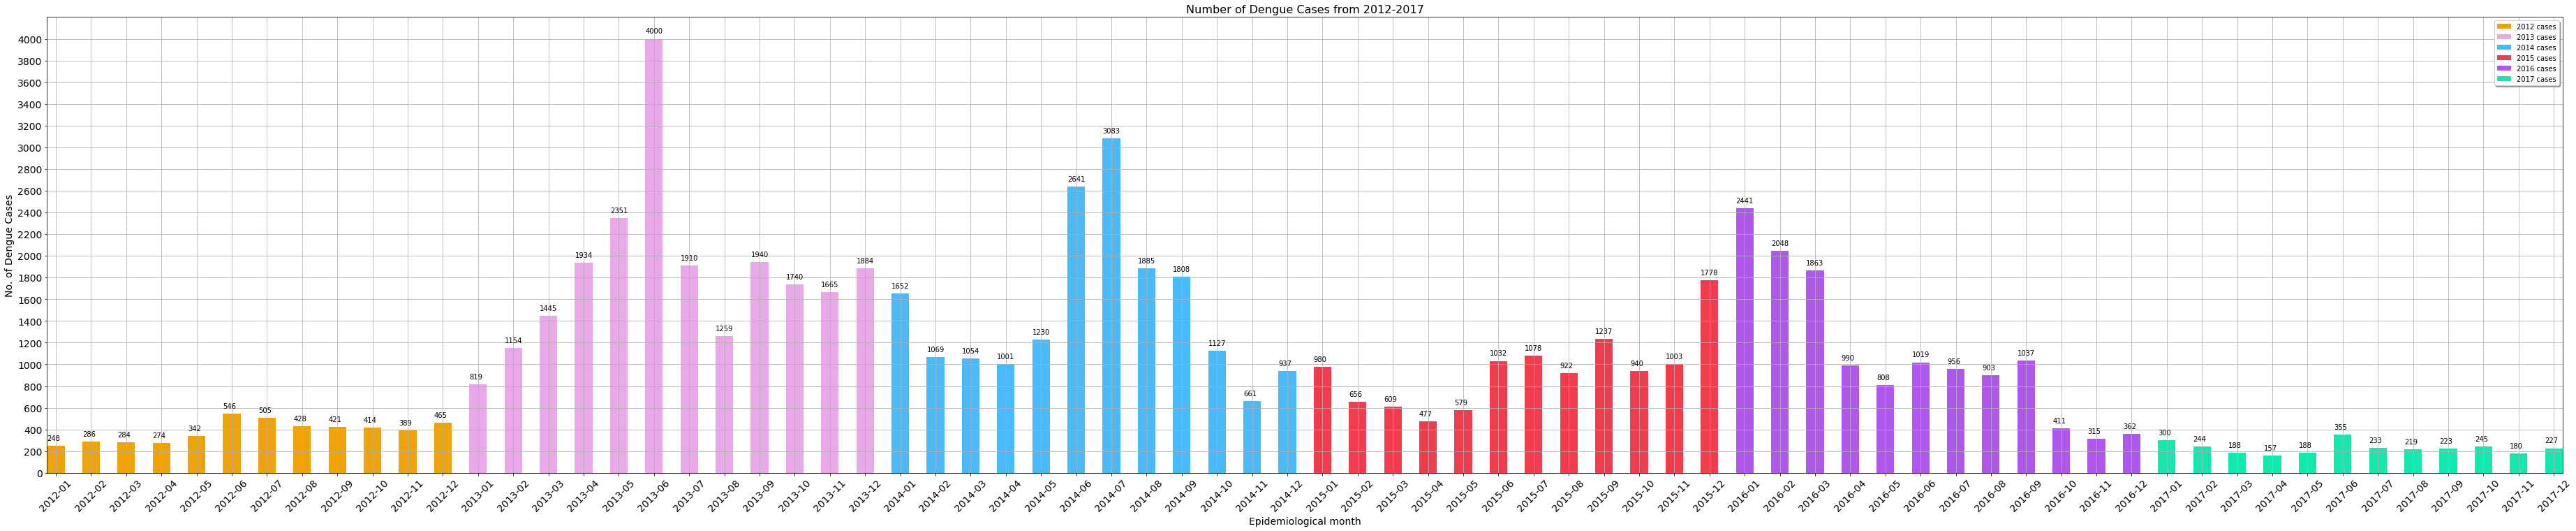

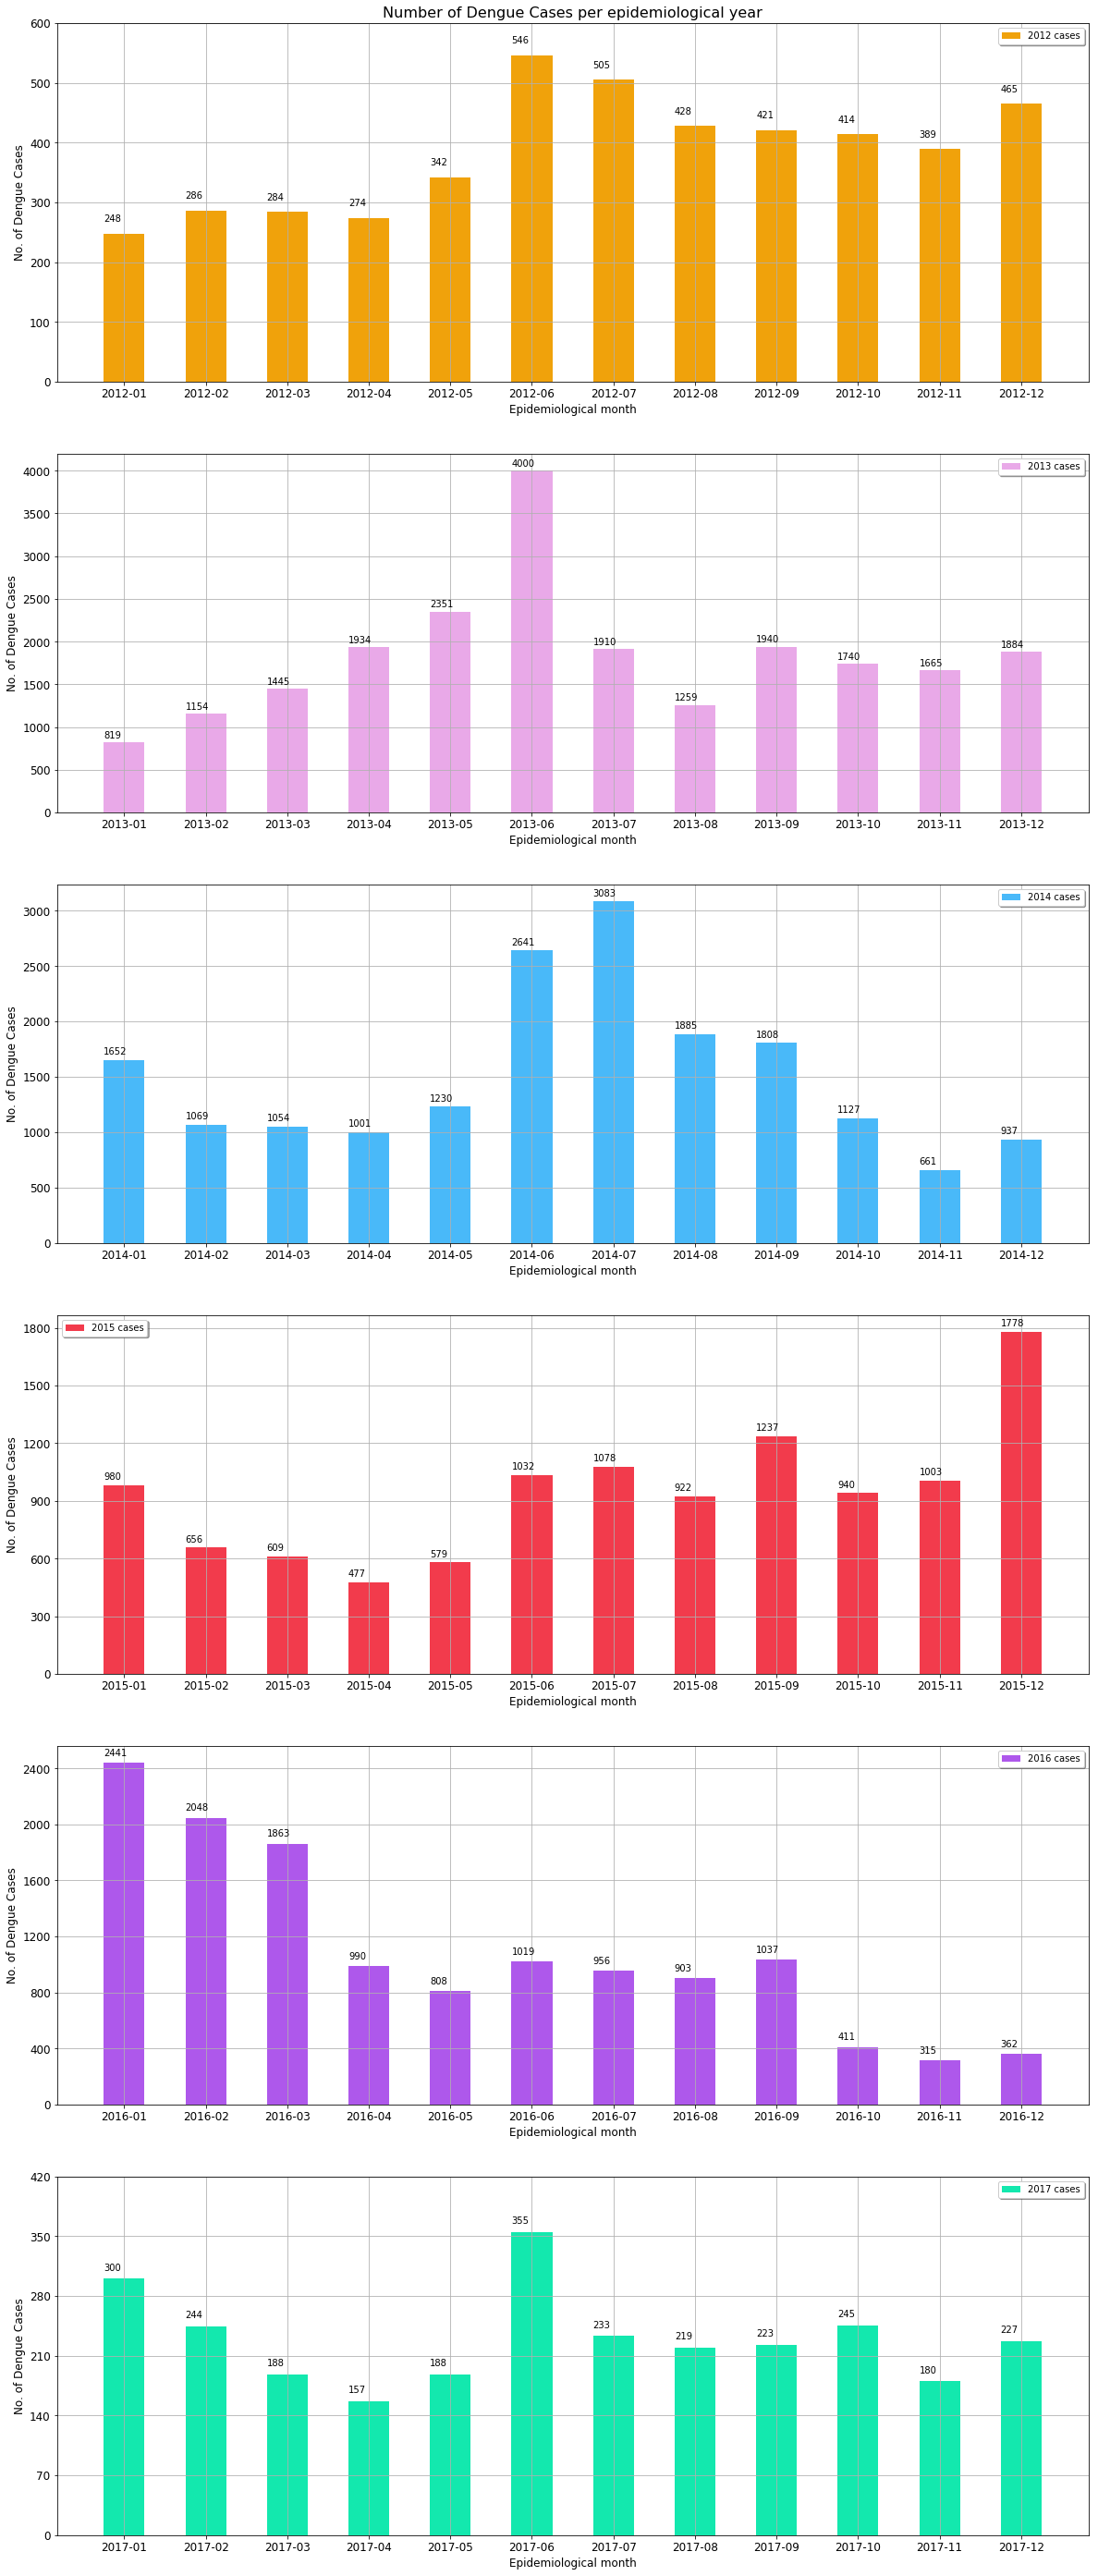

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyNumOfDengueCases']
df = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df.set_index('epi_month')

# print(df)

re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['epi_month'].str.contains(re2012)]
df2013= df[df['epi_month'].str.contains(re2013)]
df2014= df[df['epi_month'].str.contains(re2014)]
df2015= df[df['epi_month'].str.contains(re2015)]
df2016= df[df['epi_month'].str.contains(re2016)]
df2017= df[df['epi_month'].str.contains(re2017)]

# Plot overall bar chart for 2012-2017 Dengue Cases
fig = plt.figure(1, figsize=(30,12))
width = 0.5
chart  = plt.bar(df2012['epi_month'].values, df2012['no_of_cases'].values, width, color='#F0A20B', label='2012 cases')
chart += plt.bar(df2013['epi_month'].values, df2013['no_of_cases'].values, width, color='#E9A9E8', label='2013 cases')
chart += plt.bar(df2014['epi_month'].values, df2014['no_of_cases'].values, width, color='#49B9F9', label='2014 cases')
chart += plt.bar(df2015['epi_month'].values, df2015['no_of_cases'].values, width, color='#F23B4C', label='2015 cases')
chart += plt.bar(df2016['epi_month'].values, df2016['no_of_cases'].values, width, color='#AE58EB', label='2016 cases')
chart += plt.bar(df2017['epi_month'].values, df2017['no_of_cases'].values, width, color='#13E8AE', label='2017 cases')

for i in range (len(chart)):
    bar = chart[i]
    x,y = bar.get_xy()
    h = bar.get_height()
    plt.text(x, h + 50, "{:.0f}".format(df['no_of_cases'].values[i]), fontsize=10)

plt.title('Number of Dengue Cases from 2012-2017', fontsize=16)
plt.xlabel('Epidemiological month', fontsize=14)
plt.ylabel('No. of Dengue Cases', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(np.arange(0,4050,200),fontsize=14)
plt.legend(loc='upper right', shadow=True)
plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
size = ([t.get_window_extent().width for t in tl])
maxsize = np.amax(size)
m = 0.05 # inch margin
s = maxsize/plt.gcf().dpi*x+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()

#Plot bar chart for each epidemiological year
fig2 = plt.figure(2, figsize=(20,50))
width = 0.5

plt.subplot(611)
plt.title('Number of Dengue Cases per epidemiological year', fontsize=16)
chart2 = plt.bar(df2012['epi_month'].values, df2012['no_of_cases'].values, width, color='#F0A20B', label='2012 cases')
plt.xlabel('Epidemiological month', fontsize=12)
plt.ylabel('No. of Dengue Cases', fontsize=12)
plt.xticks(fontsize=12)
max = df2012['no_of_cases'].max() + 100
plt.yticks(np.arange(0,max,100),fontsize=12)
plt.legend(loc='upper right', shadow=True)
plt.grid()

for i in range (len(chart2)):
    bar = chart2[i]
    x,y = bar.get_xy()
    h = bar.get_height()
    plt.text(x, h + 20, "{:.0f}".format(df2012['no_of_cases'].values[i]), fontsize=10)

plt.subplot(612)
chart3 = plt.bar(df2013['epi_month'].values, df2013['no_of_cases'].values, width, color='#E9A9E8', label='2013 cases')
plt.xlabel('Epidemiological month', fontsize=12)
plt.ylabel('No. of Dengue Cases', fontsize=12)
plt.xticks(fontsize=12)
max = df2013['no_of_cases'].max() + 100
plt.yticks(np.arange(0,max,500),fontsize=12)
plt.legend(loc='upper right', shadow=True)
plt.grid()

for i in range (len(chart3)):
    bar = chart3[i]
    x,y = bar.get_xy()
    h = bar.get_height()
    plt.text(x, h + 50, "{:.0f}".format(df2013['no_of_cases'].values[i]), fontsize=10)

plt.subplot(613)
chart4 = plt.bar(df2014['epi_month'].values, df2014['no_of_cases'].values, width, color='#49B9F9', label='2014 cases')
plt.xlabel('Epidemiological month', fontsize=12)
plt.ylabel('No. of Dengue Cases', fontsize=12)
plt.xticks(fontsize=12)
max = df2014['no_of_cases'].max() + 100
plt.yticks(np.arange(0,max,500),fontsize=12)
plt.legend(loc='upper right', shadow=True)
plt.grid()

for i in range (len(chart4)):
    bar = chart4[i]
    x,y = bar.get_xy()
    h = bar.get_height()
    plt.text(x, h + 50, "{:.0f}".format(df2014['no_of_cases'].values[i]), fontsize=10)

plt.subplot(614)
chart5 = plt.bar(df2015['epi_month'].values, df2015['no_of_cases'].values, width, color='#F23B4C', label='2015 cases')
plt.xlabel('Epidemiological month', fontsize=12)
plt.ylabel('No. of Dengue Cases', fontsize=12)
plt.xticks(fontsize=12)
max = df2015['no_of_cases'].max() + 100
plt.yticks(np.arange(0,max,300),fontsize=12)
plt.legend(loc='upper left', shadow=True)
plt.grid()

for i in range (len(chart5)):
    bar = chart5[i]
    x,y = bar.get_xy()
    h = bar.get_height()
    plt.text(x, h + 30, "{:.0f}".format(df2015['no_of_cases'].values[i]), fontsize=10)

plt.subplot(615)
chart6 = plt.bar(df2016['epi_month'].values, df2016['no_of_cases'].values, width, color='#AE58EB', label='2016 cases')
plt.xlabel('Epidemiological month', fontsize=12)
plt.ylabel('No. of Dengue Cases', fontsize=12)
plt.xticks(fontsize=12)
max = df2016['no_of_cases'].max() + 100
plt.yticks(np.arange(0,max,400),fontsize=12)
plt.legend(loc='upper right', shadow=True)
plt.grid()

for i in range (len(chart6)):
    bar = chart6[i]
    x,y = bar.get_xy()
    h = bar.get_height()
    plt.text(x, h + 50, "{:.0f}".format(df2016['no_of_cases'].values[i]), fontsize=10)

plt.subplot(616)
chart7 = plt.bar(df2017['epi_month'].values, df2017['no_of_cases'].values, width, color='#13E8AE', label='2017 cases')
plt.xlabel('Epidemiological month', fontsize=12)
plt.ylabel('No. of Dengue Cases', fontsize=12)
plt.xticks(fontsize=12)
max = df2017['no_of_cases'].max() + 100
plt.yticks(np.arange(0,max,70),fontsize=12)
plt.legend(loc='upper right', shadow=True)
plt.grid()

for i in range (len(chart7)):
    bar = chart7[i]
    x,y = bar.get_xy()
    h = bar.get_height()
    plt.text(x, h + 10, "{:.0f}".format(df2017['no_of_cases'].values[i]), fontsize=10)

## Objective 5: Plot line chart on number of dengue cases/qtr yr

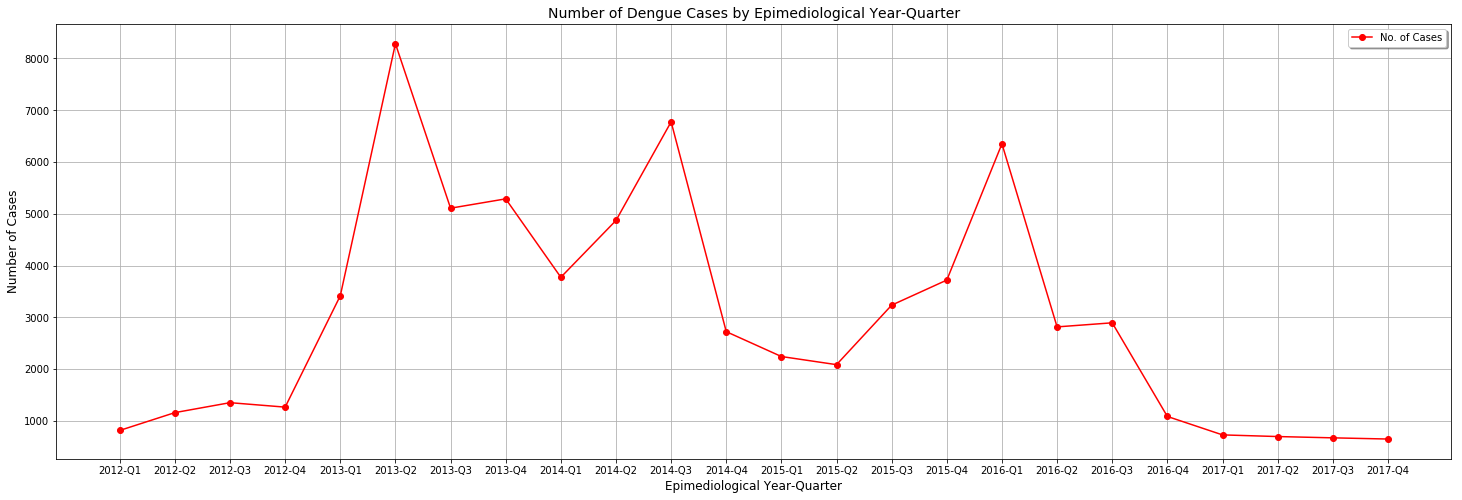

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyNumOfDengueCases']
df = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df.set_index('epi_month')

# print(df)

re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['epi_month'].str.contains(re2012)]
df2013= df[df['epi_month'].str.contains(re2013)]
df2014= df[df['epi_month'].str.contains(re2014)]
df2015= df[df['epi_month'].str.contains(re2015)]
df2016= df[df['epi_month'].str.contains(re2016)]
df2017= df[df['epi_month'].str.contains(re2017)]

v_2012_Q1 = df2012['no_of_cases'].values[0:3].sum()
v_2012_Q2 = df2012['no_of_cases'].values[3:6].sum()
v_2012_Q3 = df2012['no_of_cases'].values[6:9].sum()
v_2012_Q4 = df2012['no_of_cases'].values[9:12].sum()
v_2013_Q1 = df2013['no_of_cases'].values[0:3].sum()
v_2013_Q2 = df2013['no_of_cases'].values[3:6].sum()
v_2013_Q3 = df2013['no_of_cases'].values[6:9].sum()
v_2013_Q4 = df2013['no_of_cases'].values[9:12].sum()
v_2014_Q1 = df2014['no_of_cases'].values[0:3].sum()
v_2014_Q2 = df2014['no_of_cases'].values[3:6].sum()
v_2014_Q3 = df2014['no_of_cases'].values[6:9].sum()
v_2014_Q4 = df2014['no_of_cases'].values[9:12].sum()
v_2015_Q1 = df2015['no_of_cases'].values[0:3].sum()
v_2015_Q2 = df2015['no_of_cases'].values[3:6].sum()
v_2015_Q3 = df2015['no_of_cases'].values[6:9].sum()
v_2015_Q4 = df2015['no_of_cases'].values[9:12].sum()
v_2016_Q1 = df2016['no_of_cases'].values[0:3].sum()
v_2016_Q2 = df2016['no_of_cases'].values[3:6].sum()
v_2016_Q3 = df2016['no_of_cases'].values[6:9].sum()
v_2016_Q4 = df2016['no_of_cases'].values[9:12].sum()
v_2017_Q1 = df2017['no_of_cases'].values[0:3].sum()
v_2017_Q2 = df2017['no_of_cases'].values[3:6].sum()
v_2017_Q3 = df2017['no_of_cases'].values[6:9].sum()
v_2017_Q4 = df2017['no_of_cases'].values[9:12].sum()

data = {'epi_month'   :['2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4',  
                        '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4',  
                        '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4',  
                        '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4',  
                        '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4',  
                        '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4' ], 
        'no_of_cases': [v_2012_Q1.tolist(), v_2012_Q2.tolist(), v_2012_Q3.tolist(), v_2012_Q4.tolist(), 
                        v_2013_Q1.tolist(), v_2013_Q2.tolist(), v_2013_Q3.tolist(), v_2013_Q4.tolist(), 
                        v_2014_Q1.tolist(), v_2014_Q2.tolist(), v_2014_Q3.tolist(), v_2014_Q4.tolist(), 
                        v_2015_Q1.tolist(), v_2015_Q2.tolist(), v_2015_Q3.tolist(), v_2015_Q4.tolist(), 
                        v_2016_Q1.tolist(), v_2016_Q2.tolist(), v_2016_Q3.tolist(), v_2016_Q4.tolist(), 
                        v_2017_Q1.tolist(), v_2017_Q2.tolist(), v_2017_Q3.tolist(), v_2017_Q4.tolist() ] }
df_qtr_yr = pd.DataFrame(data)

#Compute compiled data into line chart
fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(111)

epi_month   = df_qtr_yr['epi_month'].values
no_of_cases = df_qtr_yr['no_of_cases'].values
ax1.plot(epi_month, no_of_cases, color='red', marker='o', label='No. of Cases')

plt.title('Number of Dengue Cases by Epimediological Year-Quarter', fontsize=14)
plt.xlabel('Epimediological Year-Quarter', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(loc='upper right', shadow=True)
plt.grid()

plt.show()

## Objective 6: Plot line chart on number of dengue cases/ yr

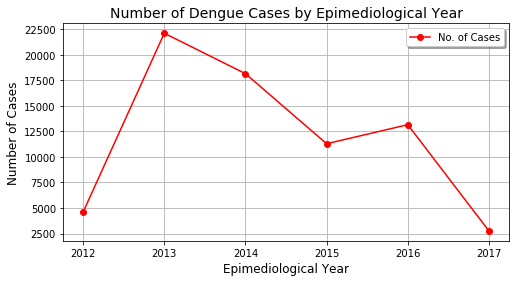

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyNumOfDengueCases']
df = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df.set_index('epi_month')

# print(df)

re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['epi_month'].str.contains(re2012)]
df2013= df[df['epi_month'].str.contains(re2013)]
df2014= df[df['epi_month'].str.contains(re2014)]
df2015= df[df['epi_month'].str.contains(re2015)]
df2016= df[df['epi_month'].str.contains(re2016)]
df2017= df[df['epi_month'].str.contains(re2017)]

v_2012 = df2012['no_of_cases'].values.sum()
v_2013 = df2013['no_of_cases'].values.sum()
v_2014 = df2014['no_of_cases'].values.sum()
v_2015 = df2015['no_of_cases'].values.sum()
v_2016 = df2016['no_of_cases'].values.sum()
v_2017 = df2017['no_of_cases'].values.sum()

data = {'year'        :[2012, 2013, 2014, 2015, 2016, 2017], 
        'no_of_cases' :[v_2012.tolist(), v_2013.tolist(), v_2014.tolist(), v_2015.tolist(), v_2016.tolist(), v_2017.tolist()] }
df_yr = pd.DataFrame(data)

#Compute compiled data into line chart
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)

epi_yr   = df_yr['year'].values
no_of_cases = df_yr['no_of_cases'].values
ax1.plot(epi_yr, no_of_cases, color='red', marker='o', label='No. of Cases')

plt.title('Number of Dengue Cases by Epimediological Year', fontsize=14)
plt.xlabel('Epimediological Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(loc='upper right', shadow=True)
plt.grid()

plt.show()

# Dataset: Rainfall - Monthly Number of Rain Days

## Objective 1: General Information of the Dataset

In [9]:
import pandas as pd

df = pd.read_csv('ca02_data/rainfall-monthly-number-of-rain-days.csv')

# Information of Original Dataset
print("===================== Information of Original Dataset ====================="); print()

print("This is the shape of the dataset")
print(df.shape);print()

print("This is the index of the dataset")
print(df.index);print()

print("These are the columns in the dataset")
print(df.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df.count());print()

print("A summary of this dataset is shown below:")
print(df.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df.describe()); print()

===================== Information of Original Dataset =====================

This is the shape of the dataset
(438, 2)

This is the index of the dataset
RangeIndex(start=0, stop=438, step=1)

These are the columns in the dataset
Index(['month', 'no_of_rainy_days'], dtype='object')

The total number of non-NA values in this dataset is:
month               438
no_of_rainy_days    438
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
month               438 non-null object
no_of_rainy_days    438 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.9+ KB
None

A descriptive statistical summary of this dataset is shown below:
       no_of_rainy_days
count        438.000000
mean          14.063927
std            4.890614
min            1.000000
25%           11.000000
50%           14.000000
75%           18.000000
max           25.000000



## Objective 2: Extract rows from 2012 - 2017

In [10]:
import pandas as pd
import pymongo
from pymongo import MongoClient

df = pd.read_csv('ca02_data/rainfall-monthly-number-of-rain-days.csv')

re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['month'].str.contains(re2012)]
df2013= df[df['month'].str.contains(re2013)]
df2014= df[df['month'].str.contains(re2014)]
df2015= df[df['month'].str.contains(re2015)]
df2016= df[df['month'].str.contains(re2016)]
df2017= df[df['month'].str.contains(re2017)]
df2012_2017 = pd.concat([df2012, df2013, df2014, df2015, df2016, df2017])
df2012_2017 = df2012_2017.reset_index()
df2012_2017 = df2012_2017.drop(['index'], axis = 1)

# Information of new Rainfall - Monthly Number of Rain Days (2012-2017) Dataset
print("================= Information of new Rainfall - Monthly Number of Rain Days (2012-2017) Dataset ================="); print()

print("This is the shape of the dataset")
print(df2012_2017.shape);print()

print("This is the index of the dataset")
print(df2012_2017.index);print()

print("These are the columns in the dataset")
print(df2012_2017.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df2012_2017.count());print()

print("A summary of this dataset is shown below:")
print(df2012_2017.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df2012_2017.describe()); print()


# Save df2012_2017 into MongoDB
client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyNumOfRainDays']
# collection.insert_many(df2012_2017.to_dict('records'))
# collection has been created, dataframe has been saved into 'mthlyNumOfDengueCases' collection

# Save df2 into csv
# df2012_2017.to_csv('ca02_data/custom/rainfall-monthly-number-of-rain-days-2012-to-2017.csv')
# dataframe has been saved into 'rainfall-monthly-number-of-rain-days-2012-to-2017.csv'

================= Information of new Rainfall - Monthly Number of Rain Days (2012-2017) Dataset =================

This is the shape of the dataset
(72, 2)

This is the index of the dataset
RangeIndex(start=0, stop=72, step=1)

These are the columns in the dataset
Index(['month', 'no_of_rainy_days'], dtype='object')

The total number of non-NA values in this dataset is:
month               72
no_of_rainy_days    72
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
month               72 non-null object
no_of_rainy_days    72 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
None

A descriptive statistical summary of this dataset is shown below:
       no_of_rainy_days
count         72.000000
mean          14.680556
std            5.365057
min            1.000000
25%           10.750000
50%           15.000000
75%           19.000000
max           24.000000



## Objective 3: Plot histogram on the frequency of rainy days per mth

Maximum number of rainy days/mth: 24
Minimum number of rainy days/mth: 1


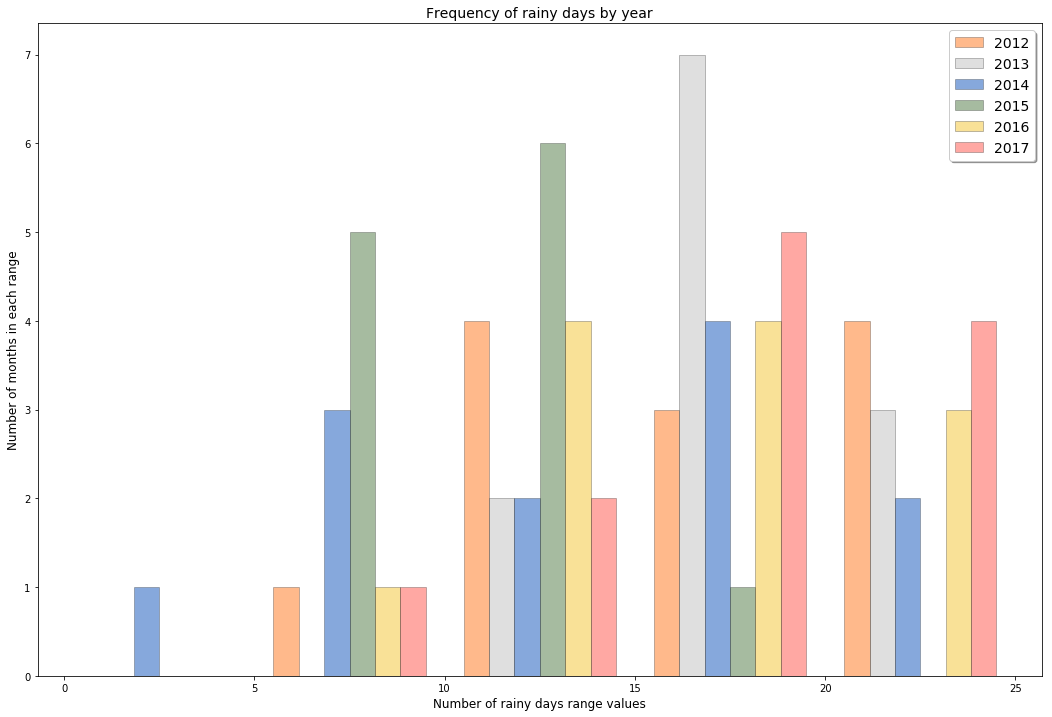

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyNumOfRainDays']
df = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df.set_index('month')

# print(df)

#put mthly num of rain days in an array, initiate labels and colors and bins

re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['month'].str.contains(re2012)]
df2013= df[df['month'].str.contains(re2013)]
df2014= df[df['month'].str.contains(re2014)]
df2015= df[df['month'].str.contains(re2015)]
df2016= df[df['month'].str.contains(re2016)]
df2017= df[df['month'].str.contains(re2017)]

mthly_num_of_rain_days_2012 = df2012['no_of_rainy_days'].values
mthly_num_of_rain_days_2013 = df2013['no_of_rainy_days'].values
mthly_num_of_rain_days_2014 = df2014['no_of_rainy_days'].values
mthly_num_of_rain_days_2015 = df2015['no_of_rainy_days'].values
mthly_num_of_rain_days_2016 = df2016['no_of_rainy_days'].values
mthly_num_of_rain_days_2017 = df2017['no_of_rainy_days'].values

mthly_num_of_rain_days = [mthly_num_of_rain_days_2012, mthly_num_of_rain_days_2013, mthly_num_of_rain_days_2014, 
                          mthly_num_of_rain_days_2015, mthly_num_of_rain_days_2016, mthly_num_of_rain_days_2017]

labels= [2012, 2013, 2014, 2015, 2016, 2017]

colors=['#FF7518', '#C0C0C0', '#0F52BA', '#4F7942', '#F4C430', '#FF5349']

bins=[0, 5, 10, 15, 20, 25]

max_num_of_rainy_days = np.amax(mthly_num_of_rain_days)
print("Maximum number of rainy days/mth: {}".format(max_num_of_rainy_days))
min_num_of_rainy_days = np.amin(mthly_num_of_rain_days)
print("Minimum number of rainy days/mth: {}".format(min_num_of_rainy_days))

#constructing histogram
plt.figure(1, figsize=(18,12))
plt.hist(mthly_num_of_rain_days,
         alpha=0.5,
         bins=bins,
         edgecolor='black',
         linewidth=0.5,
         color=colors,
         label=labels)
plt.legend(loc='best', fancybox=True, shadow=True, fontsize=14)

plt.title("Frequency of rainy days by year", fontsize=14)
plt.xlabel("Number of rainy days range values", fontsize=12)
plt.ylabel("Number of months in each range", fontsize=12)

plt.show()

# Dataset: Relative Humidity - Monthly Mean

## Objective 1: General Information of the Dataset

In [12]:
import pandas as pd

df = pd.read_csv('ca02_data/relative-humidity-monthly-mean.csv')

# Information of Original Dataset
print("===================== Information of Original Dataset ====================="); print()

print("This is the shape of the dataset")
print(df.shape);print()

print("This is the index of the dataset")
print(df.index);print()

print("These are the columns in the dataset")
print(df.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df.count());print()

print("A summary of this dataset is shown below:")
print(df.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df.describe()); print()

===================== Information of Original Dataset =====================

This is the shape of the dataset
(438, 2)

This is the index of the dataset
RangeIndex(start=0, stop=438, step=1)

These are the columns in the dataset
Index(['month', 'mean_rh'], dtype='object')

The total number of non-NA values in this dataset is:
month      438
mean_rh    438
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
month      438 non-null object
mean_rh    438 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB
None

A descriptive statistical summary of this dataset is shown below:
          mean_rh
count  438.000000
mean    82.729909
std      3.150917
min     72.000000
25%     81.000000
50%     83.000000
75%     84.900000
max     90.700000



## Objective 2: Extract rows from 2012 - 2017

In [13]:
import pandas as pd
import pymongo
from pymongo import MongoClient

df = pd.read_csv('ca02_data/relative-humidity-monthly-mean.csv')

re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['month'].str.contains(re2012)]
df2013= df[df['month'].str.contains(re2013)]
df2014= df[df['month'].str.contains(re2014)]
df2015= df[df['month'].str.contains(re2015)]
df2016= df[df['month'].str.contains(re2016)]
df2017= df[df['month'].str.contains(re2017)]
df2012_2017 = pd.concat([df2012, df2013, df2014, df2015, df2016, df2017])
df2012_2017 = df2012_2017.reset_index()
df2012_2017 = df2012_2017.drop(['index'], axis = 1)

# Information of new Relative Humidity - Monthly Mean (2012-2017) Dataset
print("================= Information of new Relative Humidity - Monthly Mean (2012-2017) Dataset ================="); print()

print("This is the shape of the dataset")
print(df2012_2017.shape);print()

print("This is the index of the dataset")
print(df2012_2017.index);print()

print("These are the columns in the dataset")
print(df2012_2017.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df2012_2017.count());print()

print("A summary of this dataset is shown below:")
print(df2012_2017.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df2012_2017.describe()); print()


# Save df2012_2017 into MongoDB
client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyRelHumidityMean']
collection.insert_many(df2012_2017.to_dict('records'))
# collection has been created, dataframe has been saved into 'mthlyRainfallTotal' collection

# Save df2 into csv
df2012_2017.to_csv('ca02_data/custom/relative-humidity-monthly-mean-2012-to-2017.csv')
# dataframe has been saved into 'relative-humidity-monthly-mean-2012-to-2017.csv'

================= Information of new Relative Humidity - Monthly Mean (2012-2017) Dataset =================

This is the shape of the dataset
(72, 2)

This is the index of the dataset
RangeIndex(start=0, stop=72, step=1)

These are the columns in the dataset
Index(['month', 'mean_rh'], dtype='object')

The total number of non-NA values in this dataset is:
month      72
mean_rh    72
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
month      72 non-null object
mean_rh    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
None

A descriptive statistical summary of this dataset is shown below:
         mean_rh
count  72.000000
mean   79.861111
std     3.868746
min    72.000000
25%    77.075000
50%    79.750000
75%    82.625000
max    87.300000



## Objective 3: Plot scatterplot to find correlation between Monthly No. of Dengue Cases and Monthly mean Relative Humidity

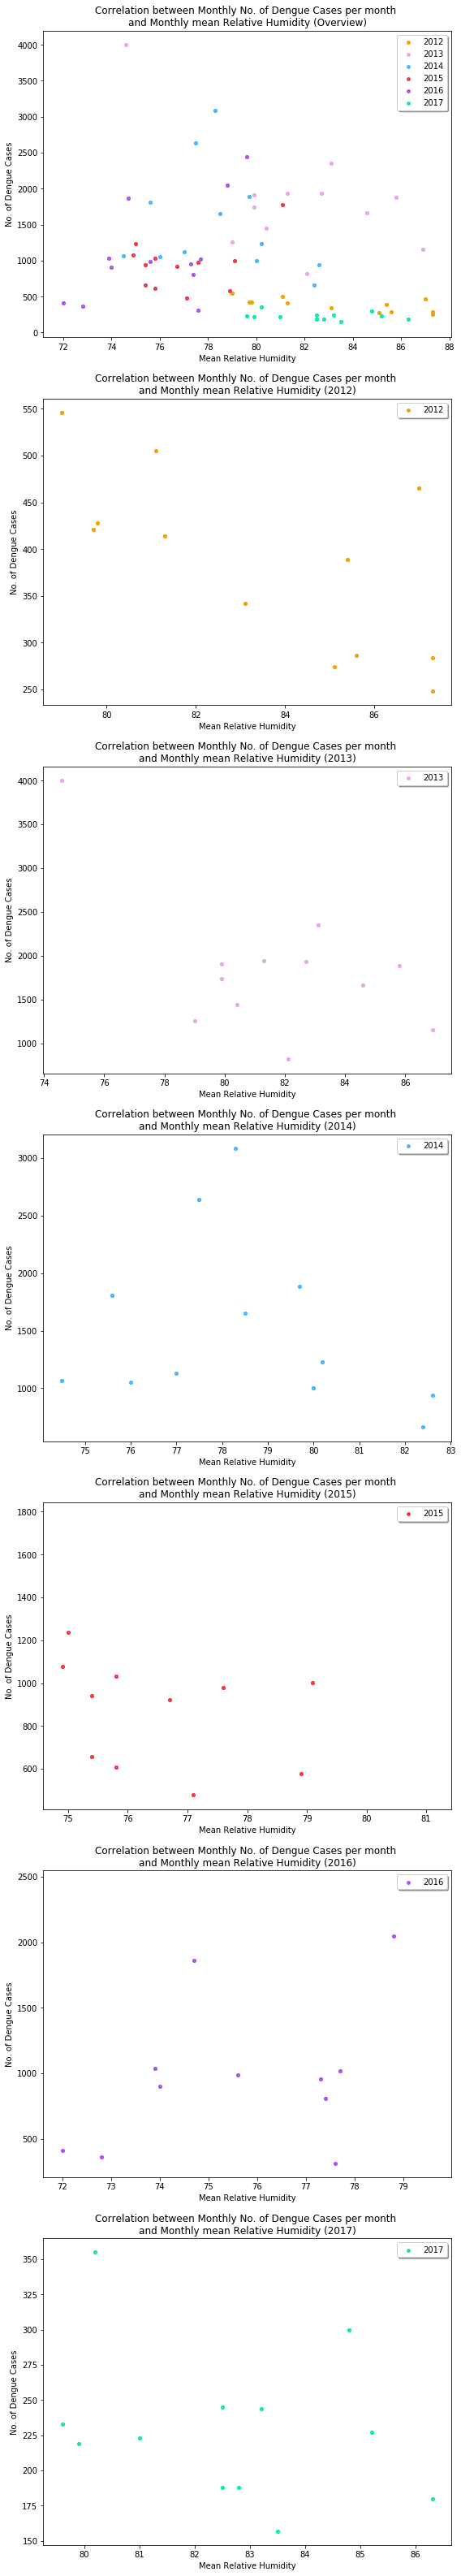

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyNumOfDengueCases']
df_dengue = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df_dengue.set_index('epi_month')
# print(df_dengue)

collection = db['mthlyRelHumidityMean']
df_relHumidity = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df_relHumidity = df_relHumidity.rename(columns={"month":"epi_month"})
df_relHumidity.set_index('epi_month')
# print(df_relHumidity)

# Combine DataFrames
df = pd.merge(df_dengue, df_relHumidity, how='left', on='epi_month')
# print(df)

# Extract DataFrame based on year
re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['epi_month'].str.contains(re2012)]
df2013= df[df['epi_month'].str.contains(re2013)]
df2014= df[df['epi_month'].str.contains(re2014)]
df2015= df[df['epi_month'].str.contains(re2015)]
df2016= df[df['epi_month'].str.contains(re2016)]
df2017= df[df['epi_month'].str.contains(re2017)]

# Get no_of_cases and rel_humidity values by year
no_of_cases2012 = df2012['no_of_cases'].values
no_of_cases2013 = df2013['no_of_cases'].values
no_of_cases2014 = df2014['no_of_cases'].values
no_of_cases2015 = df2015['no_of_cases'].values
no_of_cases2016 = df2016['no_of_cases'].values
no_of_cases2017 = df2017['no_of_cases'].values

rel_humidity2012 = df2012['mean_rh'].values
rel_humidity2013 = df2013['mean_rh'].values
rel_humidity2014 = df2014['mean_rh'].values
rel_humidity2015 = df2015['mean_rh'].values
rel_humidity2016 = df2016['mean_rh'].values
rel_humidity2017 = df2017['mean_rh'].values

# Construct scatterplot
fig1 = plt.figure(figsize=(9,40))
ax1 = plt.subplot(711)
ax1.scatter(rel_humidity2012, no_of_cases2012, s=15, c='#F0A20B', marker="o", label='2012')
ax1.scatter(rel_humidity2013, no_of_cases2013, s=15, c='#E9A9E8', marker="o", label='2013')
ax1.scatter(rel_humidity2014, no_of_cases2014, s=15, c='#49B9F9', marker="o", label='2014')
ax1.scatter(rel_humidity2015, no_of_cases2015, s=15, c='#F23B4C', marker="o", label='2015')
ax1.scatter(rel_humidity2016, no_of_cases2016, s=15, c='#AE58EB', marker="o", label='2016')
ax1.scatter(rel_humidity2017, no_of_cases2017, s=15, c='#13E8AE', marker="o", label='2017')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly mean Relative Humidity (Overview)")
plt.xlabel('Mean Relative Humidity')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax2 = plt.subplot(712)
ax2.scatter(rel_humidity2012, no_of_cases2012, s=15, c='#F0A20B', marker="o", label='2012')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly mean Relative Humidity (2012)")
plt.xlabel('Mean Relative Humidity')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax3 = plt.subplot(713)
ax3.scatter(rel_humidity2013, no_of_cases2013, s=15, c='#E9A9E8', marker="o", label='2013')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly mean Relative Humidity (2013)")
plt.xlabel('Mean Relative Humidity')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax4 = plt.subplot(714)
ax4.scatter(rel_humidity2014, no_of_cases2014, s=15, c='#49B9F9', marker="o", label='2014')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly mean Relative Humidity (2014)")
plt.xlabel('Mean Relative Humidity')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax5 = plt.subplot(715)
ax5.scatter(rel_humidity2015, no_of_cases2015, s=15, c='#F23B4C', marker="o", label='2015')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly mean Relative Humidity (2015)")
plt.xlabel('Mean Relative Humidity')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax6 = plt.subplot(716)
ax6.scatter(rel_humidity2016, no_of_cases2016, s=15, c='#AE58EB', marker="o", label='2016')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly mean Relative Humidity (2016)")
plt.xlabel('Mean Relative Humidity')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax7 = plt.subplot(717)
ax7.scatter(rel_humidity2017, no_of_cases2017, s=15, c='#13E8AE', marker="o", label='2017')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly mean Relative Humidity (2017)")
plt.xlabel('Mean Relative Humidity')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

plt.subplots_adjust(top=1.2)
plt.show()

# Dataset: Rainfall - Monthly Total

## Objective 1: General Information of the Dataset

In [15]:
import pandas as pd

df = pd.read_csv('ca02_data/rainfall-monthly-total.csv')

# Information of Original Dataset
print("===================== Information of Original Dataset ====================="); print()

print("This is the shape of the dataset")
print(df.shape);print()

print("This is the index of the dataset")
print(df.index);print()

print("These are the columns in the dataset")
print(df.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df.count());print()

print("A summary of this dataset is shown below:")
print(df.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df.describe()); print()

===================== Information of Original Dataset =====================

This is the shape of the dataset
(438, 2)

This is the index of the dataset
RangeIndex(start=0, stop=438, step=1)

These are the columns in the dataset
Index(['month', 'total_rainfall'], dtype='object')

The total number of non-NA values in this dataset is:
month             438
total_rainfall    438
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
month             438 non-null object
total_rainfall    438 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB
None

A descriptive statistical summary of this dataset is shown below:
       total_rainfall
count      438.000000
mean       178.375342
std        113.982006
min          0.200000
25%         92.800000
50%        159.450000
75%        240.150000
max        765.900000



## Objective 2: Extract rows from 2012 - 2017

In [16]:
import pandas as pd
import pymongo
from pymongo import MongoClient

df = pd.read_csv('ca02_data/rainfall-monthly-total.csv')

re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['month'].str.contains(re2012)]
df2013= df[df['month'].str.contains(re2013)]
df2014= df[df['month'].str.contains(re2014)]
df2015= df[df['month'].str.contains(re2015)]
df2016= df[df['month'].str.contains(re2016)]
df2017= df[df['month'].str.contains(re2017)]
df2012_2017 = pd.concat([df2012, df2013, df2014, df2015, df2016, df2017])
df2012_2017 = df2012_2017.reset_index()
df2012_2017 = df2012_2017.drop(['index'], axis = 1)

# Information of new Rainfall - Monthly Total (2012-2017) Dataset
print("================= Information of new Rainfall - Monthly Total (2012-2017) Dataset ================="); print()

print("This is the shape of the dataset")
print(df2012_2017.shape);print()

print("This is the index of the dataset")
print(df2012_2017.index);print()

print("These are the columns in the dataset")
print(df2012_2017.columns);print()

print("The total number of non-NA values in this dataset is:")
print(df2012_2017.count());print()

print("A summary of this dataset is shown below:")
print(df2012_2017.info());print()

print("A descriptive statistical summary of this dataset is shown below:")
print(df2012_2017.describe()); print()


# Save df2012_2017 into MongoDB
client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyRainfallTotal']
# collection.insert_many(df2012_2017.to_dict('records'))
# collection has been created, dataframe has been saved into 'mthlyRainfallTotal' collection

# Save df2 into csv
# df2012_2017.to_csv('ca02_data/custom/rainfall-monthly-total-2012-to-2017.csv')
# dataframe has been saved into 'rainfall-monthly-total-2012-to-2017.csv'

================= Information of new Rainfall - Monthly Total (2012-2017) Dataset =================

This is the shape of the dataset
(72, 2)

This is the index of the dataset
RangeIndex(start=0, stop=72, step=1)

These are the columns in the dataset
Index(['month', 'total_rainfall'], dtype='object')

The total number of non-NA values in this dataset is:
month             72
total_rainfall    72
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
month             72 non-null object
total_rainfall    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
None

A descriptive statistical summary of this dataset is shown below:
       total_rainfall
count       72.000000
mean       162.709722
std         91.999452
min          0.200000
25%         88.550000
50%        133.500000
75%        218.800000
max        395.200000



## Objective 3: Plot boxplot on the Total Rainfall by year

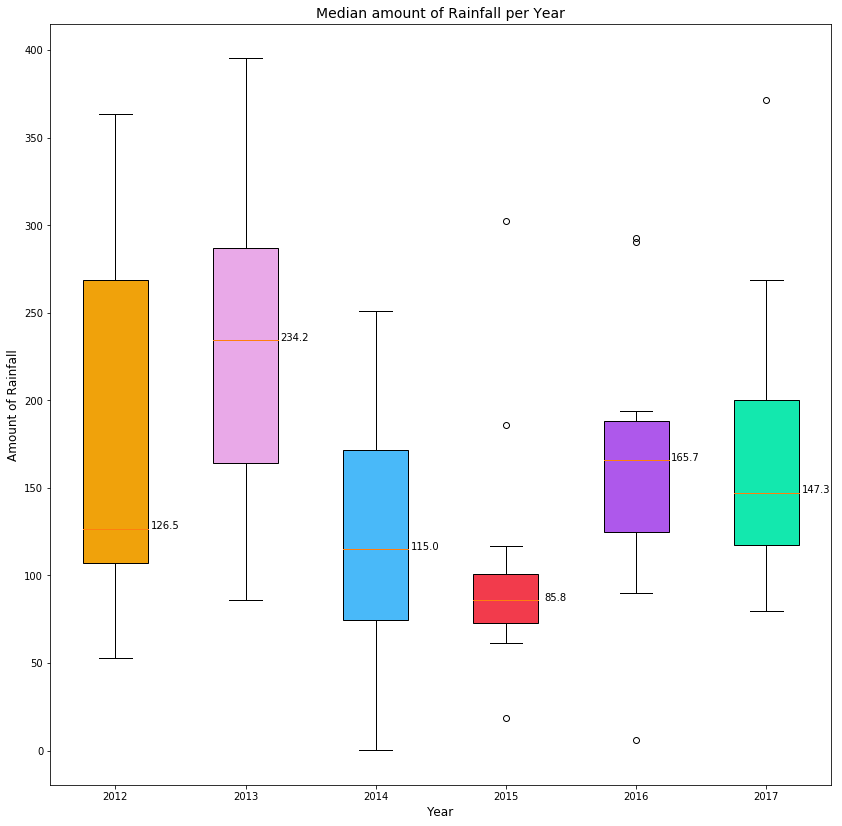

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyRainfallTotal']
df_rainfall = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df_rainfall.set_index('month')
# print(df_rainfall)

# Extract DataFrame based on year
re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df_rainfall[df_rainfall['month'].str.contains(re2012)]
df2013= df_rainfall[df_rainfall['month'].str.contains(re2013)]
df2014= df_rainfall[df_rainfall['month'].str.contains(re2014)]
df2015= df_rainfall[df_rainfall['month'].str.contains(re2015)]
df2016= df_rainfall[df_rainfall['month'].str.contains(re2016)]
df2017= df_rainfall[df_rainfall['month'].str.contains(re2017)]

# Get total rainfall by year
total_rainfall2012 = df2012['total_rainfall'].values
total_rainfall2013 = df2013['total_rainfall'].values
total_rainfall2014 = df2014['total_rainfall'].values
total_rainfall2015 = df2015['total_rainfall'].values
total_rainfall2016 = df2016['total_rainfall'].values
total_rainfall2017 = df2017['total_rainfall'].values
total_rainfall_comb = [total_rainfall2012, total_rainfall2013, total_rainfall2014, total_rainfall2015, total_rainfall2016, total_rainfall2017]

# Set labels
labels = [2012, 2013, 2014, 2015, 2016, 2017]

# Construct boxplot
plt.figure(1, figsize=(14,14))
plt.title("Median amount of Rainfall per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount of Rainfall", fontsize=12)
plt.xticks()
bplot1 = plt.boxplot(total_rainfall_comb, labels=labels, patch_artist=True, notch=False)

colors = ['#F0A20B', '#E9A9E8', '#49B9F9', '#F23B4C', '#AE58EB', '#13E8AE']
patchcolor = list(zip(bplot1['boxes'], colors))
for patch, color in patchcolor:
    patch.set_facecolor(color)

for line in bplot1['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x+0.13, y, '%.1f' % y,
         horizontalalignment='center',fontsize=10) # draw above, centered

plt.show()

## Objective 4: Plot scatterplot to find correlation between Monthly No. of Dengue Cases and Monthly Total Rainfall

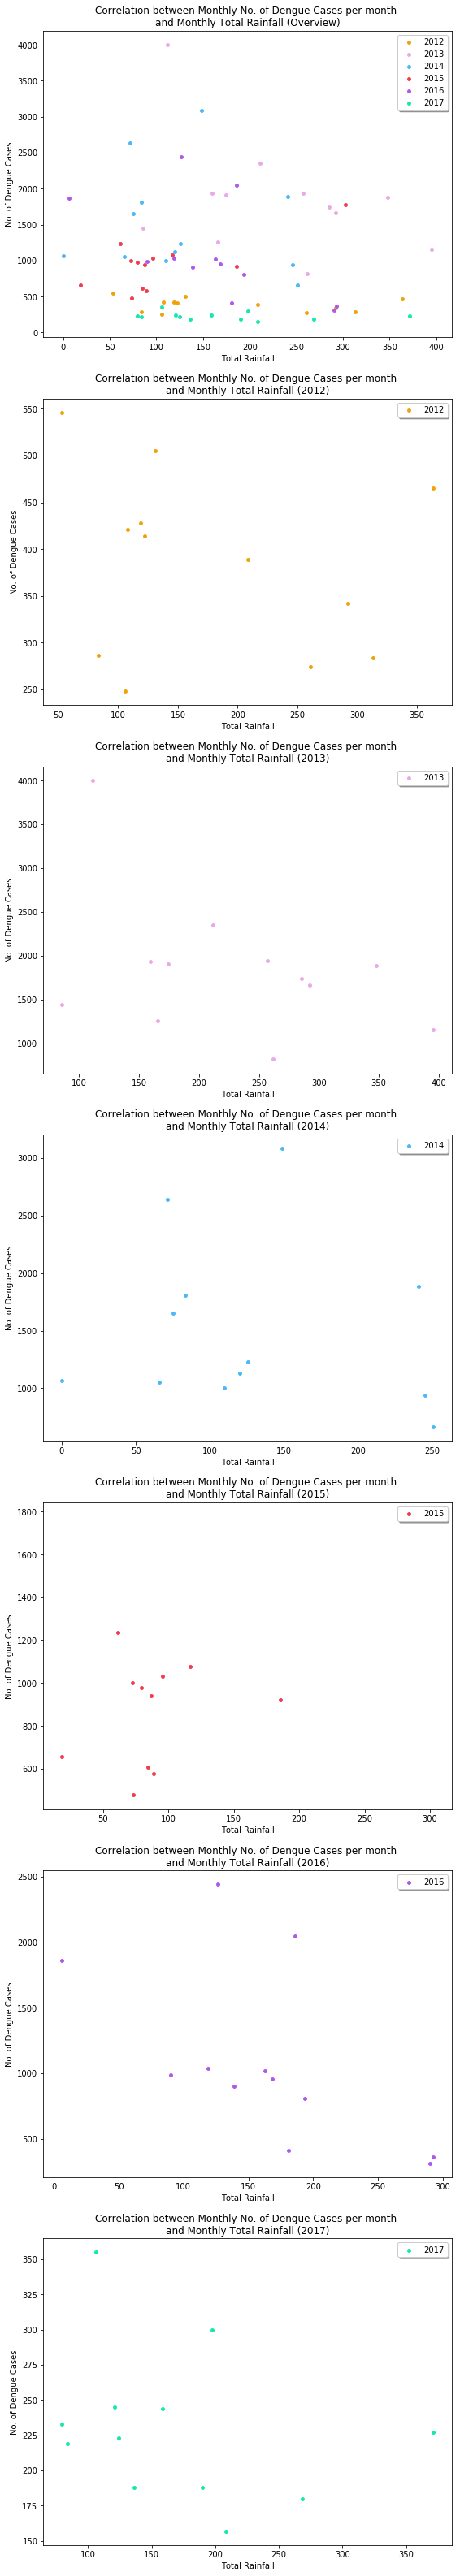

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client['pds_ca02']
collection = db['mthlyNumOfDengueCases']
df_dengue = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df_dengue.set_index('epi_month')
# print(df_dengue)

collection = db['mthlyRainfallTotal']
df_rainfall = pd.DataFrame(list(collection.find({}, { "_id" : 0 })))
df_rainfall = df_rainfall.rename(columns={"month":"epi_month"})
df_rainfall.set_index('epi_month')
# print(df_rainfall)

# Combine DataFrames
df = pd.merge(df_dengue, df_rainfall, how='left', on='epi_month')
# print(df)

# Extract DataFrame based on year
re2012 = '^2012'
re2013 = '^2013'
re2014 = '^2014'
re2015 = '^2015'
re2016 = '^2016'
re2017 = '^2017'
df2012= df[df['epi_month'].str.contains(re2012)]
df2013= df[df['epi_month'].str.contains(re2013)]
df2014= df[df['epi_month'].str.contains(re2014)]
df2015= df[df['epi_month'].str.contains(re2015)]
df2016= df[df['epi_month'].str.contains(re2016)]
df2017= df[df['epi_month'].str.contains(re2017)]

# Get no_of_cases and total rainfall values by year
no_of_cases2012 = df2012['no_of_cases'].values
no_of_cases2013 = df2013['no_of_cases'].values
no_of_cases2014 = df2014['no_of_cases'].values
no_of_cases2015 = df2015['no_of_cases'].values
no_of_cases2016 = df2016['no_of_cases'].values
no_of_cases2017 = df2017['no_of_cases'].values

rainfall2012 = df2012['total_rainfall'].values
rainfall2013 = df2013['total_rainfall'].values
rainfall2014 = df2014['total_rainfall'].values
rainfall2015 = df2015['total_rainfall'].values
rainfall2016 = df2016['total_rainfall'].values
rainfall2017 = df2017['total_rainfall'].values

# Construct scatterplot
fig1 = plt.figure(figsize=(9,40))
ax1 = plt.subplot(711)
ax1.scatter(rainfall2012, no_of_cases2012, s=15, c='#F0A20B', marker="o", label='2012')
ax1.scatter(rainfall2013, no_of_cases2013, s=15, c='#E9A9E8', marker="o", label='2013')
ax1.scatter(rainfall2014, no_of_cases2014, s=15, c='#49B9F9', marker="o", label='2014')
ax1.scatter(rainfall2015, no_of_cases2015, s=15, c='#F23B4C', marker="o", label='2015')
ax1.scatter(rainfall2016, no_of_cases2016, s=15, c='#AE58EB', marker="o", label='2016')
ax1.scatter(rainfall2017, no_of_cases2017, s=15, c='#13E8AE', marker="o", label='2017')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly Total Rainfall (Overview)")
plt.xlabel('Total Rainfall')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax2 = plt.subplot(712)
ax2.scatter(rainfall2012, no_of_cases2012, s=15, c='#F0A20B', marker="o", label='2012')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly Total Rainfall (2012)")
plt.xlabel('Total Rainfall')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax3 = plt.subplot(713)
ax3.scatter(rainfall2013, no_of_cases2013, s=15, c='#E9A9E8', marker="o", label='2013')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly Total Rainfall (2013)")
plt.xlabel('Total Rainfall')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax4 = plt.subplot(714)
ax4.scatter(rainfall2014, no_of_cases2014, s=15, c='#49B9F9', marker="o", label='2014')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly Total Rainfall (2014)")
plt.xlabel('Total Rainfall')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax5 = plt.subplot(715)
ax5.scatter(rainfall2015, no_of_cases2015, s=15, c='#F23B4C', marker="o", label='2015')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly Total Rainfall (2015)")
plt.xlabel('Total Rainfall')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax6 = plt.subplot(716)
ax6.scatter(rainfall2016, no_of_cases2016, s=15, c='#AE58EB', marker="o", label='2016')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly Total Rainfall (2016)")
plt.xlabel('Total Rainfall')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

ax7 = plt.subplot(717)
ax7.scatter(rainfall2017, no_of_cases2017, s=15, c='#13E8AE', marker="o", label='2017')
plt.title("Correlation between Monthly No. of Dengue Cases per month \nand Monthly Total Rainfall (2017)")
plt.xlabel('Total Rainfall')
plt.ylabel('No. of Dengue Cases')
plt.legend(loc='upper right', shadow=True)

plt.subplots_adjust(top=1.2)
plt.show()